In [69]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from PIL import Image, ImageOps
from pathlib import Path
from os import listdir
from collections import OrderedDict
sns.set()
# from typing import OrderedDict

In [70]:
# Path
ORIGINAL_NAME = "Исходное изображение"

PATHS = OrderedDict({
    ORIGINAL_NAME: Path("./original"),
    "Зашумлённое изображение": Path("./noised"),
    "Анизотропная диффузия": Path("./anisdiff"),
    "Регрессия с нормализацией": Path("./reg/normalized"),
    "Регрессия без нормализации": Path("./reg/not_normalized"),
    "Классификация с нормализацией": Path("./class/normalized"),
    "Классификация без нормализации": Path("./class/not_normalized"),
})

# ORIGINAL_IMAGES = Path("./original")
# NOISED_IMAGES = Path("./noised")
# ANIS_DIFF_IMAGES = Path("./anisdiff")
# CLASS_NORM_IMAGES = Path("./class/normalized")
# CLASS_NOT_NORM_IMAGES = Path("./class/not_normalized")
# REG_NORM_IMAGES = Path("./reg/normalized")
# REG_NOT_NORM_IMAGES = Path("./reg/not_normalized")

IMAGE_NAME = "5.jpg"
SLICE_INDEX = 350 # 400, 
SHIFT_BY_Y = 3


In [71]:
# Images slices
def plot_slices(img_name: str, paths: OrderedDict, slice_idx=200, shift=3):
    
    # Open image, convert to array, normalize
    images_list = [(np.array(Image.open(img / img_name)) / 255) for img in paths.values()]
    
    # Get slice, shift for y by some value, transpose arr
    y_list = np.transpose(np.array([img[slice_idx] + (shift * i) for img, i in zip(images_list, list(range(len(images_list))))]))
    
    data = pd.DataFrame(y_list, columns=paths.keys())
    
    plt.figure(figsize=(10,8))

    sns.lineplot(data)
    
    plt.ylabel('Интенсивность пикселя')
    plt.xlabel('Индекс пикселя')
    # plt.title("Срезы различных изображений")
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), shadow=False, reverse=True)

    plt.show()    
    

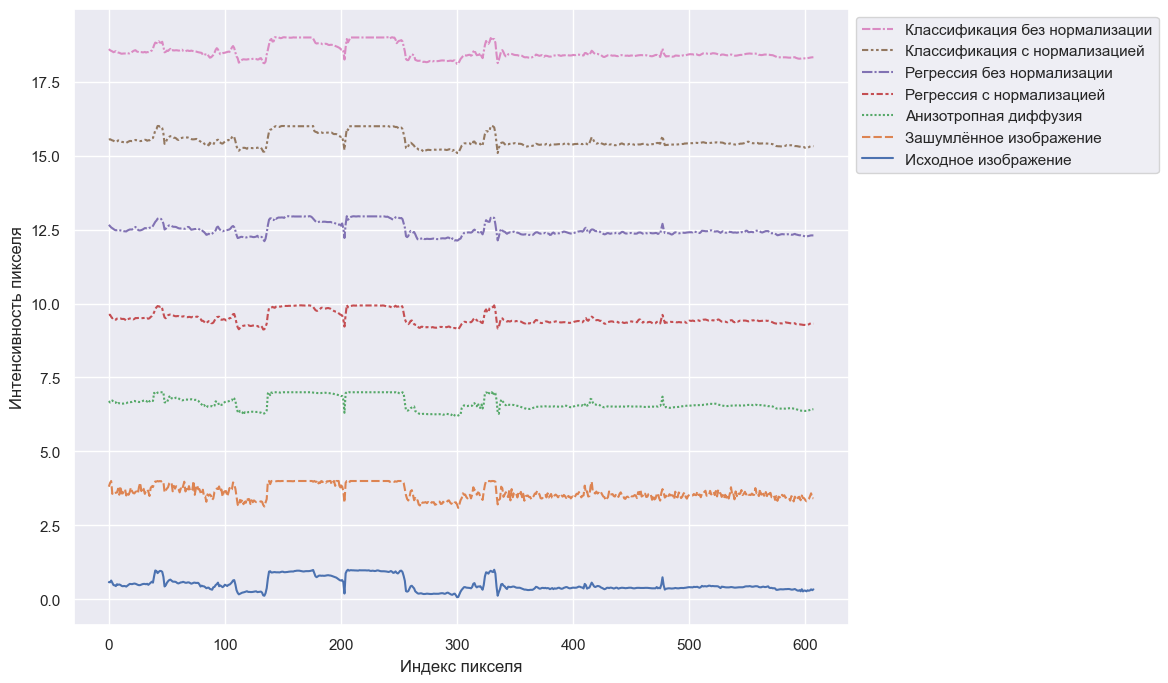

In [72]:
plot_slices(IMAGE_NAME, PATHS, SLICE_INDEX, SHIFT_BY_Y)

In [73]:
def plot_slices_subtrac_from_original(img_name: str, paths: OrderedDict, slice_idx=200, shift=3, origin_name="Исходное изображение"):
    
    # Open image, convert to array, normalize
    images_list = [(np.array(Image.open(img / img_name)) / 255) for img in paths.values()]
    
    # Open original image and get its slice
    original_img_slice = np.array(Image.open(paths[origin_name] / img_name))[slice_idx] / 255
    
    # Get slice, shift for y by some value, transpose arr
    y_list = np.transpose(np.array([(img[slice_idx] - original_img_slice) + (shift * i) for img, i in zip(images_list, list(range(len(images_list))))]))
    
    data = pd.DataFrame(y_list, columns=paths.keys())
    
    plt.figure(figsize=(10,8))

    sns.lineplot(data)
    
    plt.ylabel('Ошибка интенсивности пикселя')
    plt.xlabel('Индекс пикселя')
    # plt.title("Срезы различных изображений")
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), shadow=False, reverse=True)

    plt.show()   

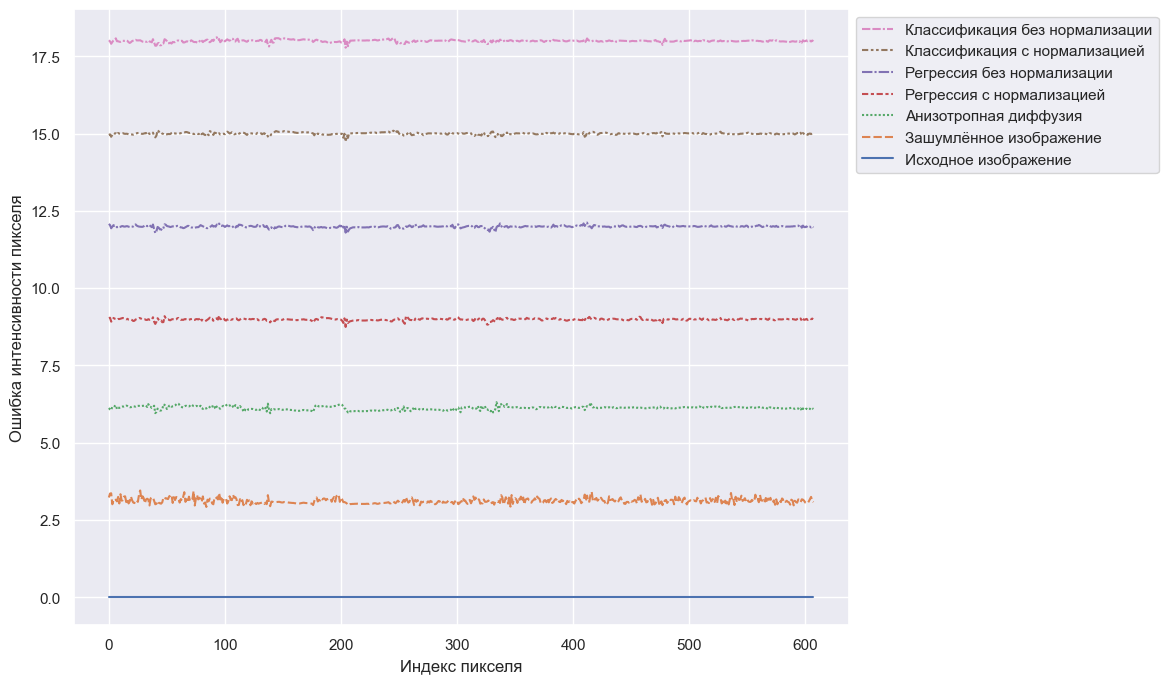

In [74]:
plot_slices_subtrac_from_original(IMAGE_NAME, PATHS, SLICE_INDEX, SHIFT_BY_Y, ORIGINAL_NAME)